In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


# Reading the data

In [2]:
df_athlete=pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

In [3]:
df_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Exploring Dataset

In [4]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df_athlete.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
df_athlete.dropna(inplace=True)

In [7]:
df_athlete.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

# 1.  Plot the distribution of medals by country

In [8]:
dis_medal=df_athlete.groupby('Team')['Medal'].count().sort_values(ascending=False).reset_index().head(15)

In [9]:
dis_medal

,Team,Medal
0,United States,4273
1,Soviet Union,2203
2,Germany,1518
3,Australia,1196
4,Russia,1091
5,Canada,1024
6,Great Britain,1010
7,Italy,1008
8,France,965
9,East Germany,935


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

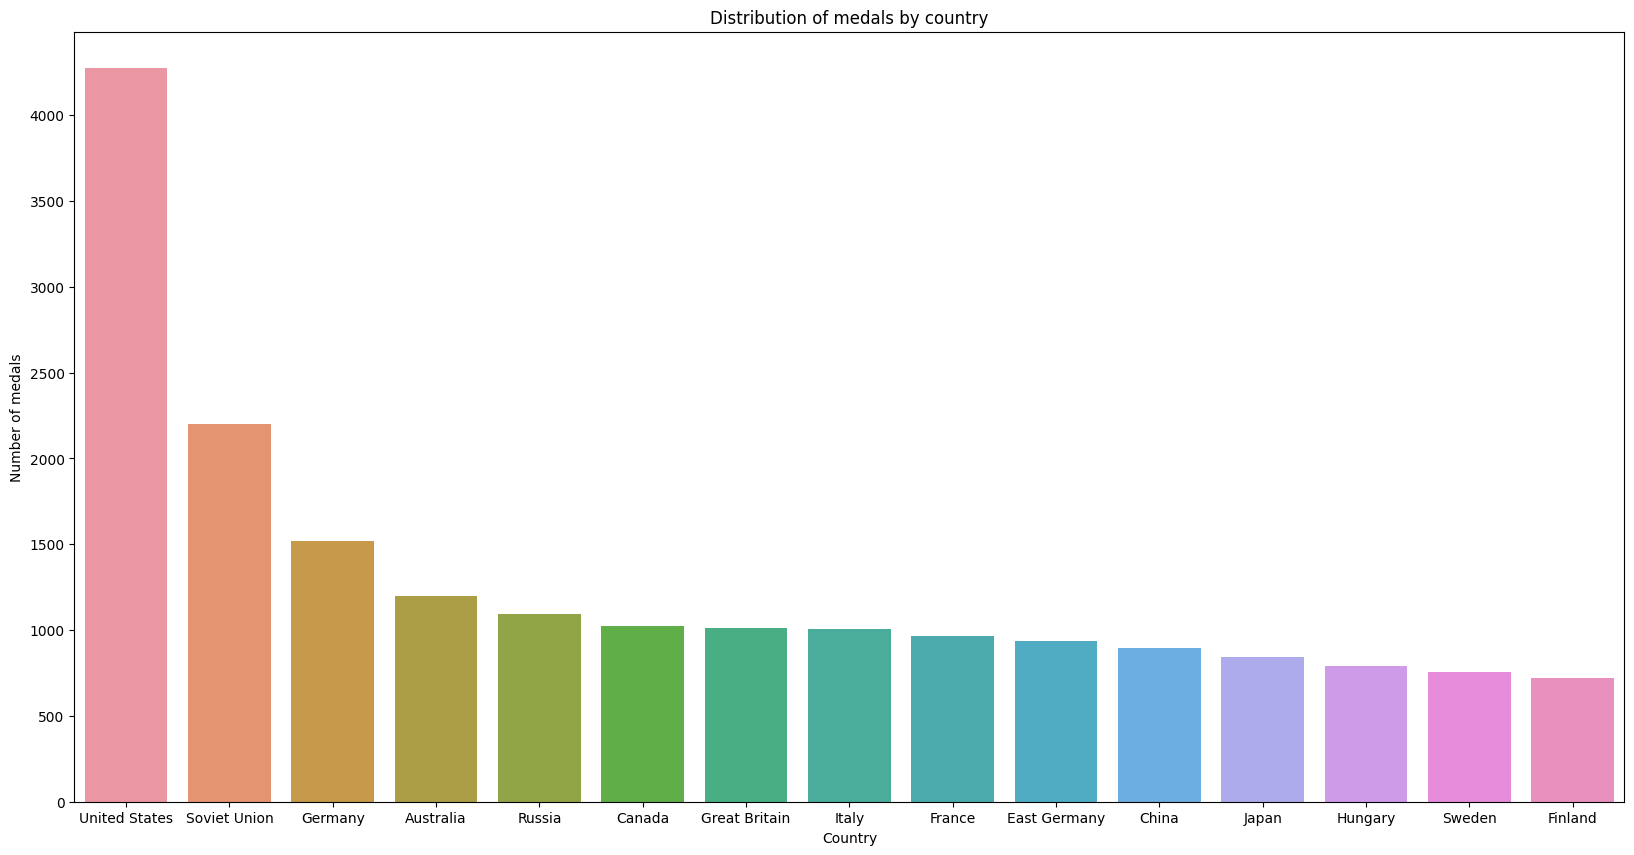

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Medal',data=dis_medal)
plt.title("Distribution of medals by country")
plt.xlabel("Country")
plt.ylabel("Number of medals")
plt.show()

# 2. Plot the number of athletes in each sport

In [12]:
sport_athlete=df_athlete.groupby('Sport')['Name'].nunique().sort_values(ascending=False).reset_index(name="No. of athletes").head(10)

Text(0.5, 1.0, 'Sportwise athlete count')

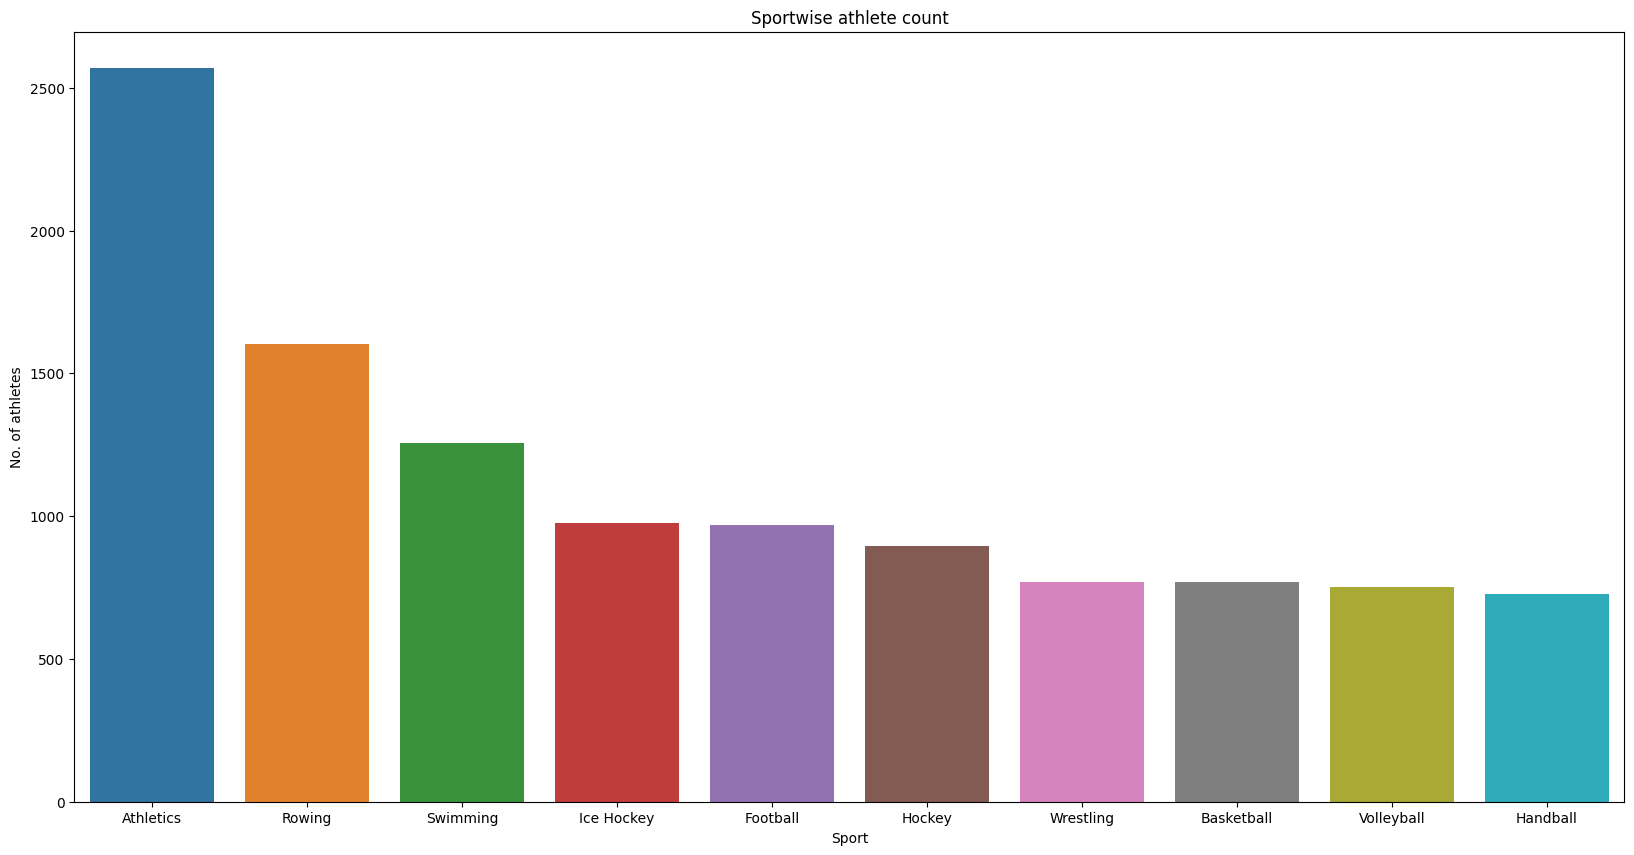

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x='Sport',y='No. of athletes',data=sport_athlete)
plt.title("Sportwise athlete count")

# 3.Top countries with the most gold medals

In [19]:
gold_df=df_athlete[df_athlete['Medal']=='Gold']
gold_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [33]:
df_gold=gold_df.groupby('Team')['Medal'].count().sort_values(ascending=False).reset_index(name="Gold_medals").head(10)

In [34]:
df_gold

,Team,Gold_medals
0,United States,2075
1,Soviet Union,961
2,Germany,508
3,East Germany,368
4,Russia,356
5,Canada,350
6,Great Britain,321
7,Australia,313
8,China,308
9,Italy,302


# 4.Plot the top countries with the most gold medals

Text(0.5, 1.0, 'Top countries wiht gold medals')

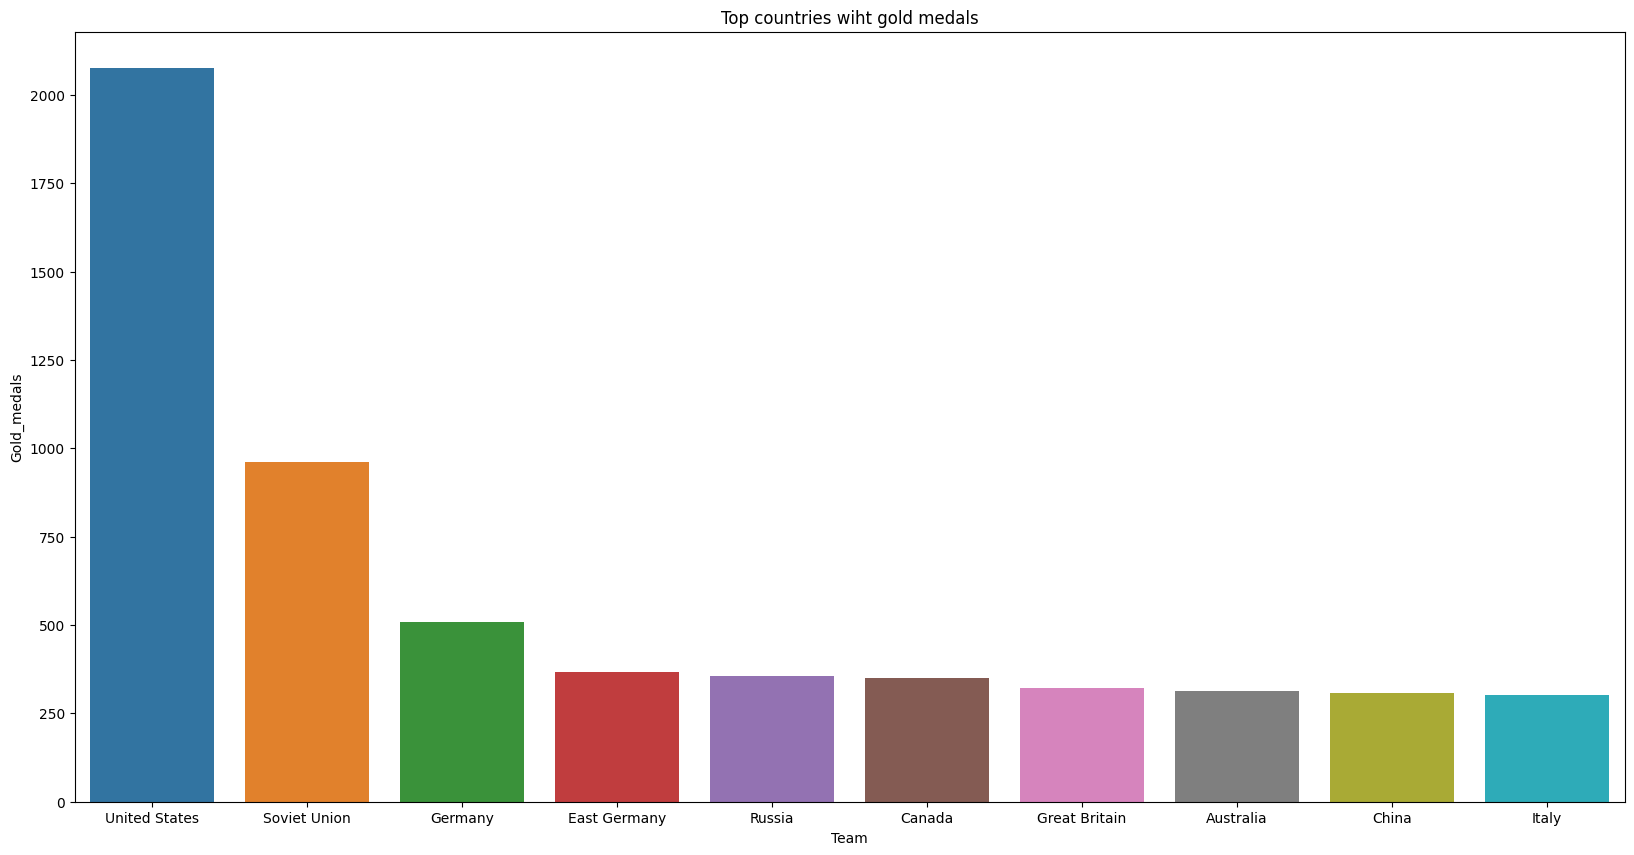

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x='Team',y='Gold_medals',data=df_gold)
plt.title("Top countries wiht gold medals")

# 5.Convert the 'Year' column to datetime

In [43]:
df_athlete['Year']=pd.to_datetime(df_athlete['Year'],format='%Y')

In [44]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30181 non-null  int64         
 1   Name    30181 non-null  object        
 2   Sex     30181 non-null  object        
 3   Age     30181 non-null  float64       
 4   Height  30181 non-null  float64       
 5   Weight  30181 non-null  float64       
 6   Team    30181 non-null  object        
 7   NOC     30181 non-null  object        
 8   Games   30181 non-null  object        
 9   Year    30181 non-null  datetime64[ns]
 10  Season  30181 non-null  object        
 11  City    30181 non-null  object        
 12  Sport   30181 non-null  object        
 13  Event   30181 non-null  object        
 14  Medal   30181 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 3.7+ MB


In [45]:
df_athlete['Year']=pd.to_datetime(df_athlete['Year']).dt.year

In [46]:
df_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [49]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int32  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(10)
memory usage: 3.6+ MB


# 6.Plot the number of medals over time

In [58]:
year_medal=df_athlete.groupby('Year')['Medal'].count().sort_values().reset_index(name='Medals')

In [59]:
year_medal

,Year,Medals
0,1896,20
1,1900,38
2,1904,59
3,1906,69
4,1912,130
5,1908,134
6,1928,170
7,1932,176
8,1920,182
9,1924,185


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Yearwise count of medals')

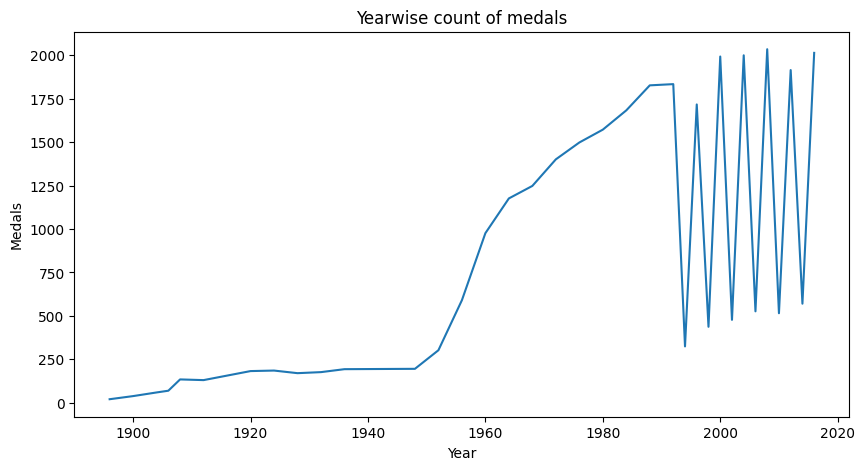

In [62]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='Medals',data=year_medal)
plt.title("Yearwise count of medals")